# 🧪**Machine Learning con Python** / Febrero 2026

##  📘 **Ejercicio 2**
### Modelo en base al data set 🍷WINES de la librería scikit-learn.

### 📈 El objetivo de este ejercicio es obtener diferentes modelos de clasificación y analizar los resultados.

Este conjunto de datos contiene 178 registros, cada uno de los cuales consta
de valores de trece (13) atributos numéricos y la clase de vino correspondiente
(0, 1 y 2).



### **Paso 0:** Importaciones.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sm
from sklearn import neighbors as knn
from sklearn.svm import SVC


### **Paso 1:** Carga y exploración inicial de datos.

Verificamos si el tipo de variables es uniforme para cada atributo, y si hay presencia de valores nulos. En caso de encontrar discrepancia en los tipos de datos o nulidades, se deberá agregar un paso de limpieza y estandarización sobre los tipos de datos. 

In [29]:
vinos = load_wine()
X = vinos.data
y = vinos.target

df_vinos = pd.DataFrame(X, columns=vinos.feature_names)

df_vinos.info() 

df_vinos.head()

<class 'pandas.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: float64(13)
m

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Visualización previa de las distribuciones. 

Como primer paso, utilizamos el modelo de **Análisis de Componentes Principales PCA** esto permite reducir la clasificación a menos variables (menos dimensiones), dejando las más relevantes para la diferenciación de clases. 

Los componentes principales se seleccionan en función de la varianza de los datos. El método busca nuevas variables (componentes) que sean combinaciones lineales de las variables originales y que cumplan dos condiciones:

- El primer componente principal (PC1) es la dirección en la que los datos presentan la mayor varianza posible. Es decir, concentra la mayor cantidad de información.

- El segundo componente principal (PC2) es la dirección que explica la mayor varianza restante, pero siendo ortogonal (independiente) al primero.

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

feature_names = vinos.feature_names

componentes = pd.DataFrame(
    pca.components_,
    columns=feature_names,
    index=["PC1", "PC2"]
)

print("Componentes principales encontrados:")
componentes.abs().T.sort_values("PC1", ascending=False).head(3)


Componentes principales encontrados:


,PC1,PC2
proline,0.999823,0.017774
magnesium,0.017868,0.999344
alcalinity_of_ash,0.004671,0.026450


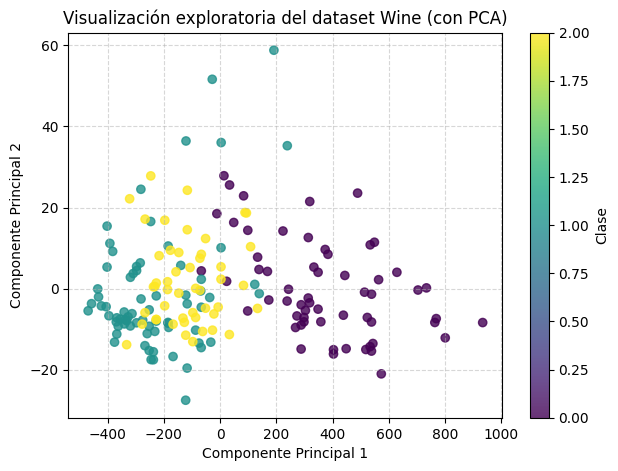

In [31]:
df_pca = pd.DataFrame(
    X_pca,
    columns=["Componente Principal 1", "Componente Principal 2"]
)
df_pca["Clase"] = y

plt.figure(figsize=(7, 5))
scatter = plt.scatter(
    df_pca["Componente Principal 1"],
    df_pca["Componente Principal 2"],
    c=df_pca["Clase"],
    alpha=0.8
)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización exploratoria del dataset Wine (con PCA)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.colorbar(scatter, label="Clase")

plt.show()


Observamos que las clases no pueden diferenciarse con claridad, se encuentran superpuestas en la zona central del diagrama.

### **Paso 2:** PCA con Normalización.

Dado que las variables del dataset presentan distintas escalas y unidades de medida, aplicaremos un proceso de normalización mediante estandarización. 

Este método transforma cada variable para que tenga media cero y desviación estándar uno, evitando que aquellas con mayor magnitud dominen el análisis. 

La normalización resulta fundamental para garantizar una contribución equilibrada de todas las variables.

In [32]:
X_scaled = StandardScaler().fit_transform(X)
pca_scaled= PCA(n_components=2)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

componentes_scaled = pd.DataFrame(
    pca_scaled.components_,
    columns=feature_names,
    index=["PC1", "PC2"]
)

print("Componentes principales por PCA luego de normalizar:")

print(componentes_scaled.abs().T.sort_values("PC1", ascending=False).head(3))

df_pca_scaled= pd.DataFrame(
    X_pca_scaled,
    columns=["Componente Principal 1", "Componente Principal 2"]
)
df_pca_scaled["Clase"] = y

Componentes principales por PCA luego de normalizar:
                                   PC1       PC2
flavanoids                    0.422934  0.003360
total_phenols                 0.394661  0.065040
od280/od315_of_diluted_wines  0.376167  0.164496


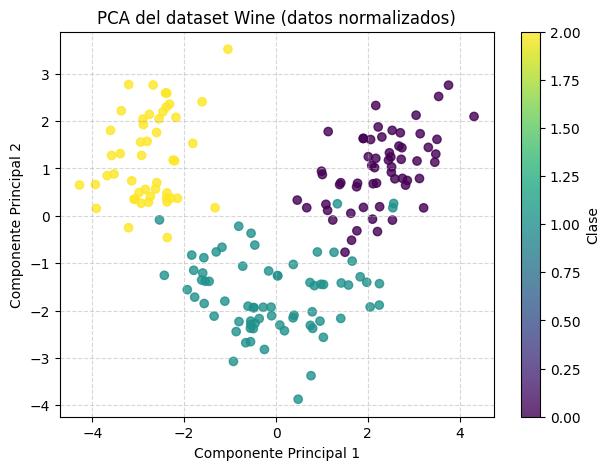

In [33]:
# Gráfico de dispersión
plt.figure(figsize=(7, 5))
scatter = plt.scatter(
    df_pca_scaled["Componente Principal 1"],
    df_pca_scaled["Componente Principal 2"],
    c=df_pca_scaled["Clase"],
    alpha=0.8
)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA del dataset Wine (datos normalizados)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.colorbar(scatter, label="Clase")

plt.show()

Luego de la normalización, vemos las clases mejor definidas en 3 zonas según los componentes mayoritarios encontrados por la función.

### **Paso 3:** Determinación de conjuntos de entrenamiento y de prueba.

Para asegurar la correspondencia entre los conjuntos de datos originales y normalizados, la división en entrenamiento y prueba se realizó a partir de los mismos índices generados con una semilla fija (random_state). 

De este modo, las filas asignadas a cada conjunto mantienen el mismo orden y representan las mismas observaciones en ambos datasets.

Usamos stratify=y, para asegurar que train y test contengan aproximadamente la misma distribución de clases, y que el conjunto de prueba sea representativo del dataset original.

In [34]:
indices = np.arange(len(X))

idx_train, idx_test = train_test_split(
    indices,
    test_size=0.2,
    random_state=66,
    stratify=y
)

X_train_raw = X_pca[idx_train]
X_test_raw = X_pca[idx_test]

X_train_scaled = X_pca_scaled[idx_train]
X_test_scaled = X_pca_scaled[idx_test]

y_train = y[idx_train]
y_test = y[idx_test]

### **Paso 4:** Aplicamos el modelo de regresión logística. 

Inicializamos y ajustamos con los datos de entrenamiento. 

Se realiza el procedimiento por duplicado, para los datos crudos (o raw) y los normalizados.

In [35]:
clas_log_raw = LogisticRegression(solver='lbfgs', C=0.5, max_iter=600)
clas_log_raw.fit(X_train_raw, y_train)

accuracy_train_raw = round(clas_log_raw.score(X_train_raw, y_train), 4)
print(f"Accuracy del clasificador logístico (con los datos train sin normalizar): {accuracy_train_raw}")

accuracy_test_raw = round(clas_log_raw.score(X_test_raw, y_test), 4)
print(f"Accuracy del clasificador logístico (con los datos test sin normalizar): {accuracy_test_raw}")

Accuracy del clasificador logístico (con los datos train sin normalizar): 0.7254
Accuracy del clasificador logístico (con los datos test sin normalizar): 0.6667


In [36]:
# Agrego mapas de colores 
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

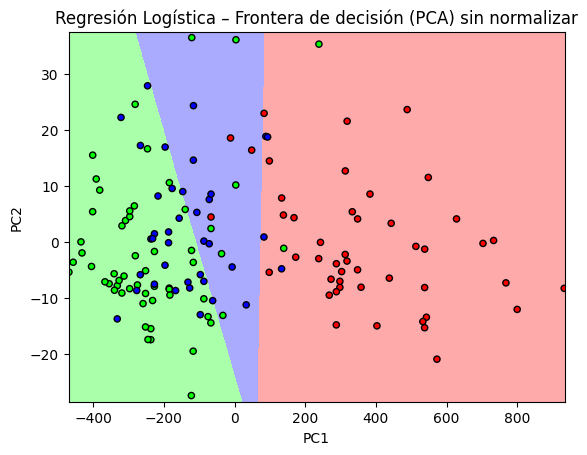

In [37]:
h = 0.2

x_min, x_max = X_train_raw[:, 0].min() - 1, X_train_raw[:, 0].max() + 1
y_min, y_max = X_train_raw[:, 1].min() - 1, X_train_raw[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = clas_log_raw.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(
    X_train_raw[:, 0],
    X_train_raw[:, 1],
    c=y_train,
    cmap=cmap_bold,
    edgecolor='k',
    s=20
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Regresión Logística – Frontera de decisión (PCA) sin normalizar")
plt.show()

In [38]:
clas_log_scaled = LogisticRegression(solver='lbfgs', C=0.5, max_iter=600)
clas_log_scaled.fit(X_train_scaled, y_train)

accuracy_train_scaled = round(clas_log_scaled.score(X_train_scaled, y_train), 4)
print(f"Accuracy del clasificador logístico (con los datos train normalizados): {accuracy_train_scaled}")

accuracy_test_scaled = round(clas_log_scaled.score(X_test_scaled, y_test), 4)
print(f"Accuracy del clasificador logístico (con los datos test normalizados): {accuracy_test_scaled}")

Accuracy del clasificador logístico (con los datos train normalizados): 0.9718
Accuracy del clasificador logístico (con los datos test normalizados): 0.9722


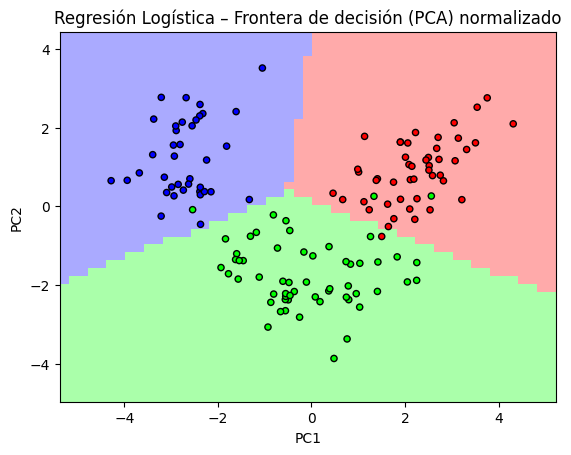

In [39]:
h = 0.2

x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = clas_log_scaled.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(
    X_train_scaled[:, 0],
    X_train_scaled[:, 1],
    c=y_train,
    cmap=cmap_bold,
    edgecolor='k',
    s=20
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Regresión Logística – Frontera de decisión (PCA) normalizado")
plt.show()


### Matriz de confusión para los modelos logísticos.

La matriz de confusión muestra cuántas observaciones fueron clasificadas correctamente y cuántas fueron asignadas a clases incorrectas.

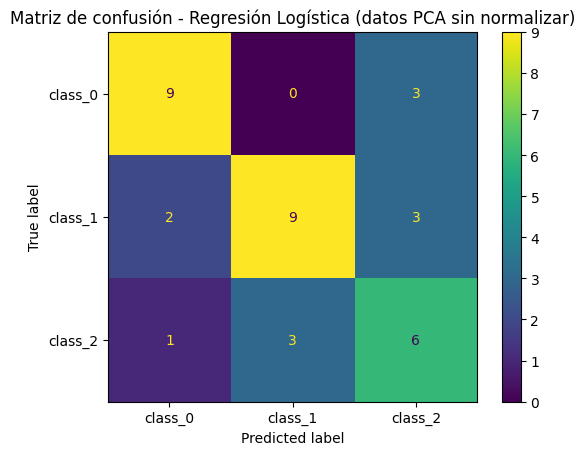

In [40]:
# Para el dataset raw

y_pred_log_raw = clas_log_raw.predict(X_test_raw)

cm = sm.confusion_matrix(y_test, y_pred_log_raw)

disp = sm.ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=vinos.target_names
)

disp.plot()
plt.title("Matriz de confusión - Regresión Logística (datos PCA sin normalizar)")
plt.show()

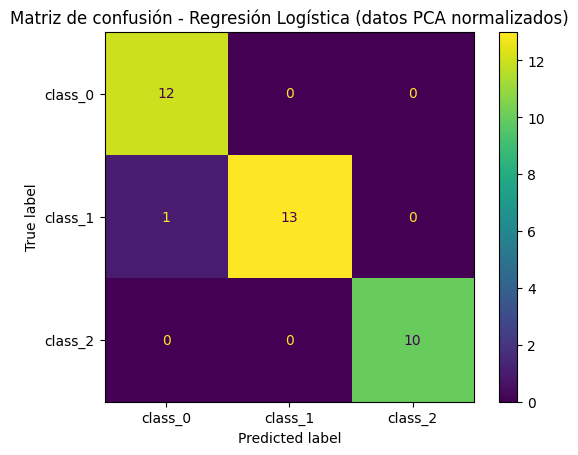

In [41]:
# Matriz de confusión para el dataset normalizado

y_pred_log_scaled = clas_log_scaled.predict(X_test_scaled)

cm = sm.confusion_matrix(y_test, y_pred_log_scaled)

disp = sm.ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=vinos.target_names
)

disp.plot()
plt.title("Matriz de confusión - Regresión Logística (datos PCA normalizados)")
plt.show()

### **Paso 5:** Aplicamos el modelo de KNN (Nearest Neighbors).

Mismo procedimiento comparativo, aplicamos en ambos datasets.

In [42]:
# Configuración previa

n_neighbors = 8
weights = 'distance'

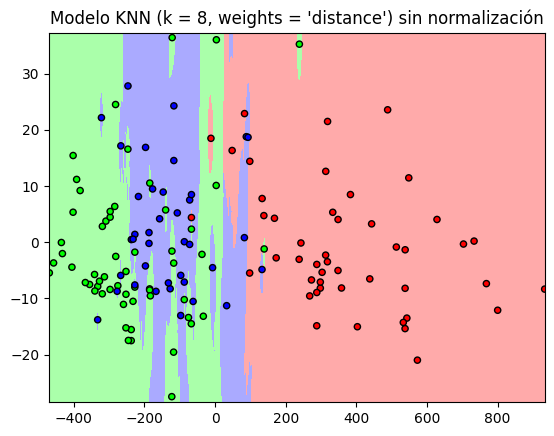

In [43]:
# KNN para datos raw

h = 0.2

clas_knn_raw = knn.KNeighborsClassifier(n_neighbors, weights=weights)
clas_knn_raw.fit(X_train_raw, y_train)

x_min, x_max = X_train_raw[:, 0].min() - 1, X_train_raw[:, 0].max() + 1
y_min, y_max = X_train_raw[:, 1].min() - 1, X_train_raw[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clas_knn_raw.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(
X_train_raw[:, 0],
X_train_raw[:, 1],
c=y_train,
cmap=cmap_bold,
edgecolor='k',
s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Modelo KNN (k = %i, weights = '%s') sin normalización" % (n_neighbors, weights))
    
Xn = np.array(X_test_raw)
Yn = clas_knn_raw.predict(Xn)
plt.show()

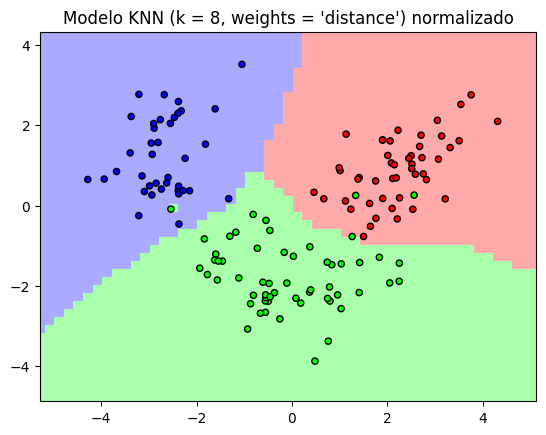

In [44]:
# KNN para datos normalizados

h = 0.2

clas_knn_scaled = knn.KNeighborsClassifier(n_neighbors, weights=weights)
clas_knn_scaled.fit(X_train_scaled, y_train)

x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clas_knn_scaled.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(
X_train_scaled[:, 0],
X_train_scaled[:, 1],
c=y_train,
cmap=cmap_bold,
edgecolor='k',
s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Modelo KNN (k = %i, weights = '%s') normalizado" % (n_neighbors, weights))
    
Xn = np.array(X_test_scaled)
Yn = clas_knn_scaled.predict(Xn)
plt.show()

In [45]:
accuracy_train_raw_knn = round(clas_knn_raw.score(X_train_raw, y_train), 4)
print(f"Accuracy del clasificador KNN (con los datos train sin normalizar): {accuracy_train_raw_knn}")

accuracy_test_raw_knn = round(clas_knn_raw.score(X_test_raw, y_test), 4)
print(f"Accuracy del clasificador KNN (con los datos test sin normalizar): {accuracy_test_raw_knn}")

Accuracy del clasificador KNN (con los datos train sin normalizar): 1.0
Accuracy del clasificador KNN (con los datos test sin normalizar): 0.6111


In [46]:
accuracy_train_scaled_knn = round(clas_knn_scaled.score(X_train_scaled, y_train), 4)
print(f"Accuracy del clasificador KNN (con los datos train normalizados): {accuracy_train_scaled_knn}")

accuracy_test_scaled_knn = round(clas_knn_scaled.score(X_test_scaled, y_test), 4)
print(f"Accuracy del clasificador KNN (con los datos test normalizados): {accuracy_test_scaled_knn}")

Accuracy del clasificador KNN (con los datos train normalizados): 1.0
Accuracy del clasificador KNN (con los datos test normalizados): 0.9722


### Matriz de confusión para los modelos de KNN.


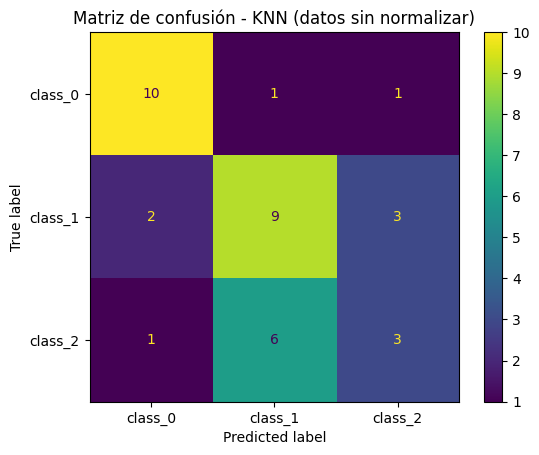

In [47]:
# Para el dataset raw

y_pred_knn_raw = clas_knn_raw.predict(X_test_raw)

cm = sm.confusion_matrix(y_test, y_pred_knn_raw)

disp = sm.ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=vinos.target_names
)

disp.plot()
plt.title("Matriz de confusión - KNN (datos sin normalizar)")
plt.show()

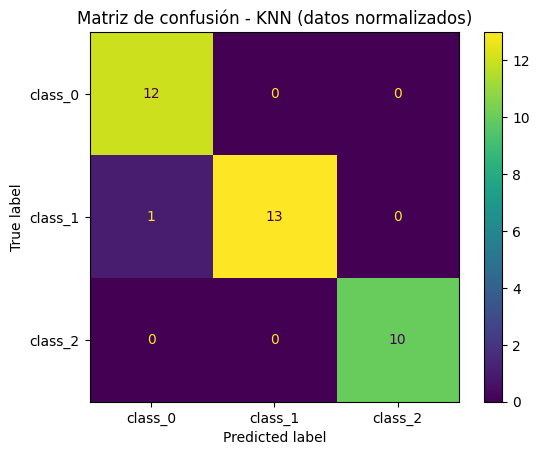

In [48]:
# Para el dataset normalizado

y_pred_knn_scaled = clas_knn_scaled.predict(X_test_scaled)

cm = sm.confusion_matrix(y_test, y_pred_knn_scaled)

disp = sm.ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=vinos.target_names
)

disp.plot()
plt.title("Matriz de confusión - KNN (datos normalizados)")
plt.show()

### **Paso 6:** Aplicamos el modelo de SVM (Suport Vector Machine) con kernel lineal.

In [49]:
clas_svm_raw= SVC(kernel='linear', C=0.5)
clas_svm_raw.fit(X_train_raw, y_train)

accuracy_train_raw_svm = round(clas_svm_raw.score(X_train_raw, y_train), 4)
accuracy_test_raw_svm = round(clas_svm_raw.score(X_test_raw, y_test), 4)

print(f"Accuracy SVM (train) sin normalizar: {accuracy_train_raw_svm}")
print(f"Accuracy SVM (test) sin normalizar: {accuracy_test_raw_svm}")

Accuracy SVM (train) sin normalizar: 0.7394
Accuracy SVM (test) sin normalizar: 0.7222


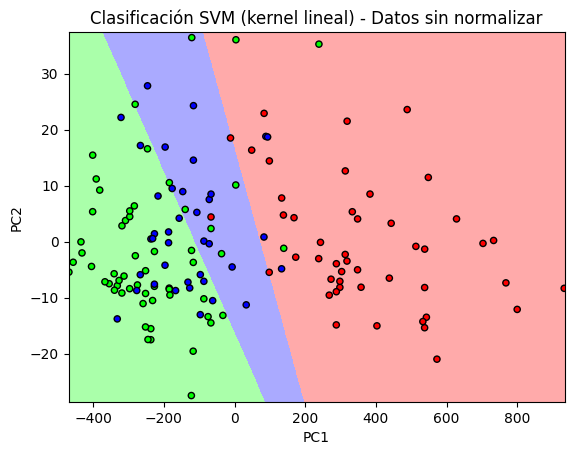

In [50]:
# Visualización de la frontera de decisión para el dataset raw

h = 0.2

x_min, x_max = X_train_raw[:, 0].min() - 1, X_train_raw[:, 0].max() + 1
y_min, y_max = X_train_raw[:, 1].min() - 1, X_train_raw[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = clas_svm_raw.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(
    X_train_raw[:, 0],
    X_train_raw[:, 1],
    c=y_train,
    cmap=cmap_bold,
    edgecolor='k',
    s=20
)

plt.title("Clasificación SVM (kernel lineal) - Datos sin normalizar")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [51]:
clas_svm_scaled= SVC(kernel='linear', C=0.5)
clas_svm_scaled.fit(X_train_scaled, y_train)

accuracy_train_scaled_svm = round(clas_svm_scaled.score(X_train_scaled, y_train), 4)
accuracy_test_scaled_svm = round(clas_svm_scaled.score(X_test_scaled, y_test), 4)

print(f"Accuracy SVM (train), datos normalizados: {accuracy_train_scaled_svm}")
print(f"Accuracy SVM (test), datos normalizados: {accuracy_test_scaled_svm}")

Accuracy SVM (train), datos normalizados: 0.9718
Accuracy SVM (test), datos normalizados: 0.9722


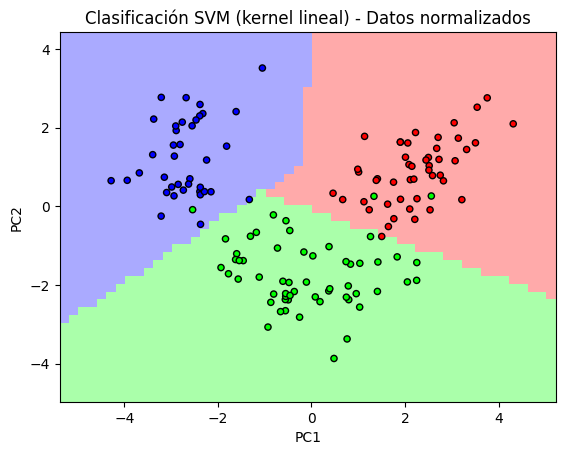

In [52]:
h = 0.2

x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = clas_svm_scaled.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(
    X_train_scaled[:, 0],
    X_train_scaled[:, 1],
    c=y_train,
    cmap=cmap_bold,
    edgecolor='k',
    s=20
)

plt.title("Clasificación SVM (kernel lineal) - Datos normalizados")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


### Matriz de confusión para los modelos de SVM (kernel lineal)


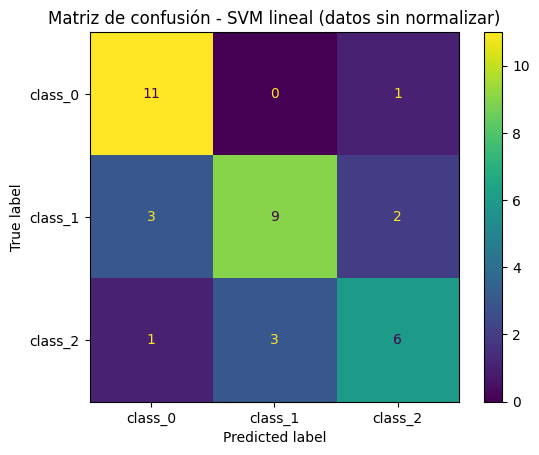

In [53]:
# Para el dataset raw

y_pred_svm_raw= clas_svm_raw.predict(X_test_raw)

cm = sm.confusion_matrix(y_test, y_pred_svm_raw)

disp = sm.ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=vinos.target_names
)

disp.plot()
plt.title("Matriz de confusión - SVM lineal (datos sin normalizar)")
plt.show()

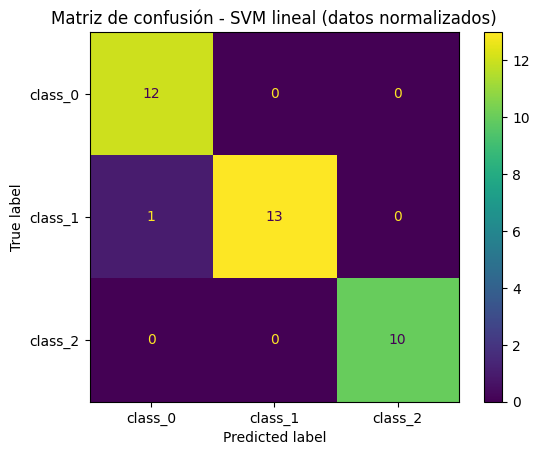

In [54]:
# Para el dataset normalizado

y_pred_svm_scaled = clas_svm_scaled.predict(X_test_scaled)

cm = sm.confusion_matrix(y_test, y_pred_svm_scaled)

disp = sm.ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=vinos.target_names
)

disp.plot()
plt.title("Matriz de confusión - SVM lineal (datos normalizados)")
plt.show()

### Tabla general de resultados:

| Modelo              | Preprocesamiento | Accuracy Train | Accuracy Test |
| ------------------- | ---------------- | -------------- | ------------- |
| Regresión Logística | PCA Sin normalizar   | 0.7254         | 0.6667    |
| Regresión Logística | PCA Normalizado      | 0.9718         | **0.9722**    |
| KNN (k=8, distance) | PCA Sin normalizar   | 1.0000         | 0.6111    |
| KNN (k=8, distance) | PCA Normalizado      | 1.0000         | **0.9722**    |
| SVM lineal          | PCA Sin normalizar   | 0.7394         | 0.7222    |
| SVM lineal          | PCA Normalizado      | 0.9718         | **0.9722**    |



### Resumen de Matrices de confusión entre modelos:

| Modelo | Preprocesamiento | Accuracy | Observación |
|----------|------------------|----------|-------------|
| Regresión Logística | Sin normalizar | 0.67 | Fuerte confusión entre todas las clases. Bajo desempeño general. |
| Regresión Logística | Normalizado | 0.97 | Separación excelente (solo 1 tipo errado). Gran mejora tras escalar. |
| KNN (k=8, distance) | Sin normalizar | 0.61 | Fuerte confusión entre todas las clases. Bajo desempeño general. |
| KNN (k=8, distance) | Normalizado | 0.97 | Resultado equivalente a los otros modelos normalizados. |
| SVM lineal | Sin normalizar | 0.72 | Fuerte confusión entre todas las clases. Bajo desempeño general. |
| SVM lineal | Normalizado | 0.97 | Resultado equivalente a los otros modelos normalizados. |


## Conclusión General: Impacto del Preprocesamiento y PCA

El análisis comparativo de los modelos de clasificación (Regresión Logística, KNN y SVM lineal) aplicado al dataset Wine, reducido a dos componentes principales mediante PCA, demuestra que el tratamiento previo de los datos es determinante en el desempeño de los modelos.

- **Impacto de la normalización**: Se observó una diferencia significativa en el rendimiento según el tratamiento de escala. Sin normalización, los modelos presentaron desempeños bajos e inestables (Accuracy ≈ 0.61 - 0.72), con una fuerte confusión entre clases en las matrices de confusión. Esto se debe a que las variables originales poseen escalas muy diferentes, lo que distorsiona el espacio de características y afecta especialmente a modelos sensibles a la distancia y al margen como KNN y SVM.

- **Mejora con datos estandarizados**: Tras aplicar la estandarización, todos los modelos alcanzaron un desempeño alto y muy similar (Accuracy ≈ 0.97). Las matrices de confusión mostraron únicamente un error puntual entre dos clases, lo que indica que, una vez corregida la escala, el problema se vuelve prácticamente linealmente separable en el espacio reducido a dos dimensiones por PCA.

- **Interpretación principal**: Los resultados evidencian que el preprocesamiento tiene un impacto mayor que la elección del algoritmo en este caso particular. La reducción de dimensionalidad mediante PCA conservó suficiente información para permitir una separación casi perfecta, siempre que los datos estuvieran correctamente escalados.

En conclusión, la estandarización previa al modelado resultó fundamental para mejorar drásticamente el rendimiento y obtener una clasificación estable y consistente entre distintos modelos. Esto confirma que una representación adecuada de los datos es un factor clave para alcanzar resultados óptimos.
